# Import and stuff

In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import os

In [46]:
white_list = [] # White

with open("extended_white_list.json", 'r') as file:
    file_parsed = json.load(file)
    for case in file_parsed:
        file_name = case["file_name"]
        white_list.append(file_name)

# OS Analisys

In [47]:
from pathlib import Path


OG_PATH = "/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata"

p = Path(OG_PATH)
dirs = [x for x in p.iterdir() if x.is_dir()]
# dirs = [f for f in os.listdir(OG_PATH) if os.path.isdir(f)]
print(dirs)


[PosixPath('/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/0a33ed75-7e05-4d81-a033-87a609fd500b'), PosixPath('/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/0aa29406-19f4-40f6-8688-24d02e9eac34'), PosixPath('/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/0ac66199-dc17-49b6-ad2e-fc819bc1d8b0'), PosixPath('/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/0af79449-8002-42c6-a5a0-c88d8e846095'), PosixPath('/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/0b1a4ea2-96fa-49a2-8e50-96b41acc69ba'), PosixPath('/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/0b06f80f-1360-4311-8342-32f178fe6050'), PosixPath('/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/0b20e27c-9a09-4f15-923f-d5b4f185dc22'), PosixPath('/homes/mcolombari/AI_for_Bioi

In [48]:
import re
r = re.compile('.*.xml')

file_name_dict = {}

for dir in dirs:
    file_name_list = [x for x in dir.iterdir() if r.match(str(x))]
    if len(file_name_list) == 1:
        file_name = file_name_list[0]
        # print(file_name)

        # dir_name = str(dir).split("/")[-1]
        relative_file_name = str(file_name).split("/")[-1]
        # print(relative_file_name)
        # print(dir_name)
        file_name_dict[relative_file_name] = str(file_name)
        # print(file_name)

print(file_name_dict)


{'nationwidechildrens.org_clinical.TCGA-20-0996.xml': '/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/0a33ed75-7e05-4d81-a033-87a609fd500b/nationwidechildrens.org_clinical.TCGA-20-0996.xml', 'nationwidechildrens.org_clinical.TCGA-13-0903.xml': '/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/0af79449-8002-42c6-a5a0-c88d8e846095/nationwidechildrens.org_clinical.TCGA-13-0903.xml', 'nationwidechildrens.org_clinical.TCGA-04-1367.xml': '/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/0b1a4ea2-96fa-49a2-8e50-96b41acc69ba/nationwidechildrens.org_clinical.TCGA-04-1367.xml', 'nationwidechildrens.org_clinical.TCGA-23-1113.xml': '/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Raw_Data/XML-OS-rawdata/0b06f80f-1360-4311-8342-32f178fe6050/nationwidechildrens.org_clinical.TCGA-23-1113.xml', 'nationwidechildrens.org_clinical.TCGA-13-1500.xml': '/homes/mcolombari/AI_for_Bioi

In [49]:
len(file_name_list)

1

In [50]:
print(file_name_dict.keys())

dict_keys(['nationwidechildrens.org_clinical.TCGA-20-0996.xml', 'nationwidechildrens.org_clinical.TCGA-13-0903.xml', 'nationwidechildrens.org_clinical.TCGA-04-1367.xml', 'nationwidechildrens.org_clinical.TCGA-23-1113.xml', 'nationwidechildrens.org_clinical.TCGA-13-1500.xml', 'nationwidechildrens.org_clinical.TCGA-61-1736.xml', 'nationwidechildrens.org_clinical.TCGA-13-1489.xml', 'nationwidechildrens.org_clinical.TCGA-61-1734.xml', 'nationwidechildrens.org_clinical.TCGA-04-1361.xml', 'nationwidechildrens.org_clinical.TCGA-13-0727.xml', 'nationwidechildrens.org_clinical.TCGA-24-1555.xml', 'nationwidechildrens.org_clinical.TCGA-57-1994.xml', 'nationwidechildrens.org_clinical.TCGA-24-1466.xml', 'nationwidechildrens.org_clinical.TCGA-30-1880.xml', 'nationwidechildrens.org_clinical.TCGA-29-1762.xml', 'nationwidechildrens.org_clinical.TCGA-24-1928.xml', 'nationwidechildrens.org_clinical.TCGA-13-0730.xml', 'nationwidechildrens.org_clinical.TCGA-29-1691.xml', 'nationwidechildrens.org_clinical.T

In [51]:
import xml.etree.ElementTree as ET

dead_list = []
alive_list = []

for file_name in white_list:
    # print(file_name)
    complete_path = file_name_dict[file_name]

    tree = ET.parse(complete_path)
    root = tree.getroot()

    namespaces = {
        'admin': 'http://tcga.nci/bcr/xml/administration/2.7',
        'ov': 'http://tcga.nci/bcr/xml/clinical/ov/2.7',
        'clin_shared': "http://tcga.nci/bcr/xml/clinical/shared/2.7"
    }
    # print(root.findall('.//clin_shared:days_to_death',namespaces)[0].text)
    # print(root.findall('.//clin_shared:days_to_birth',namespaces)[0].text)
    # print(root.findall('.//clin_shared:days_to_death',namespaces)[0].text)
    # print(root.findall('.//clin_shared:days_to_last_followup',namespaces)[0].text)
    Days_to_death = root.findall('.//clin_shared:days_to_death',namespaces)[0].text
    Days_to_last_followup = root.findall('.//clin_shared:days_to_last_followup',namespaces)[0].text

    if not Days_to_death == None:
        # Dead.
        dead_list.append(Days_to_death)
    elif not Days_to_last_followup == None:
        # Alive.
        alive_list.append(Days_to_last_followup)





In [52]:
print(dead_list)

['506', '1106', '1583', '2742', '820', '336', '1024', '1933', '304', '455', '1946', '1329', '1688', '3337', '1102', '479', '885', '1955', '515', '1446', '976', '608', '1091', '1646', '31', '31', '737', '1767', '1249', '731', '1018', '1369', '676', '3622', '1583', '663', '1059', '9', '1446', '1266', '1189', '2400', '701', '1451', '346', '1769', '565', '637', '74', '962', '528', '728', '695', '1024', '1104', '1082', '1187', '189', '1516', '863', '9', '1123', '197', '286', '636', '1073', '2717', '396', '1354', '462', '1032', '446', '457', '2490', '2154', '1341', '1157', '2648', '4624', '788', '1483', '1380', '24', '1169', '1620', '1470', '949', '1484', '1158', '1757', '1155', '583', '555', '1484', '1278', '1746', '8', '820', '1579', '1199', '1114', '75', '61', '676', '1511', '1354', '2089', '679', '65', '1499', '2634', '1058', '61', '1279', '354', '1579', '1000', '53', '1384', '1562', '1977', '730', '1213', '895', '1089', '11', '1264', '627', '1004', '23', '138', '542', '1229', '3224', '9

Text(0.5, 1.0, 'Days to death hist')

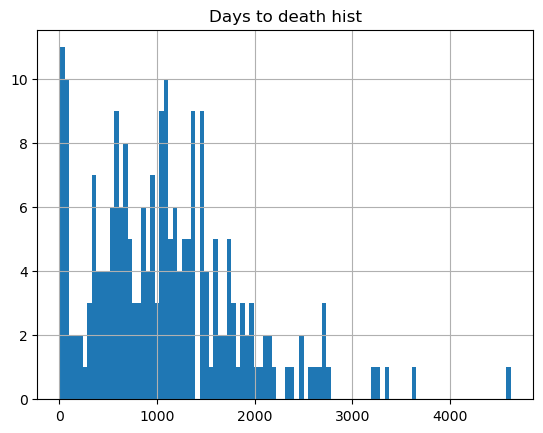

In [53]:
dead = pd.Series([int(d) for d in dead_list])
alive = pd.Series([int(d) for d in alive_list])

import numpy as np

# print(max(dead_list))

# plotting labelled histogram
dead.hist(bins=100)
plt.title("Days to death hist")
# plt.xticks(np.arange(0, 500, step=40))
# plt.xlabel('weight')
# plt.ylabel('Person count')
# plt.show()


Text(0.5, 1.0, 'Days to last followup hist')

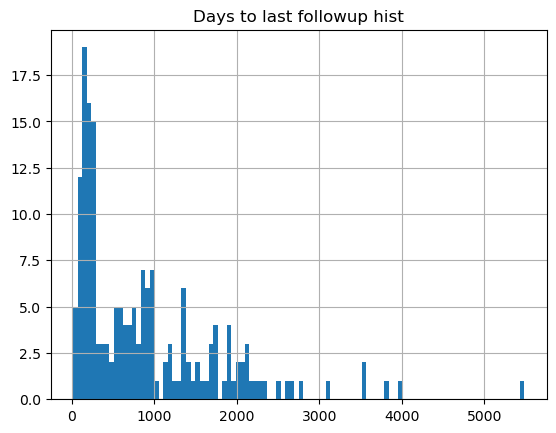

In [54]:
alive.hist(bins=100)
plt.title("Days to last followup hist")

In [55]:
print(f"Dead people: {len(dead_list)}")
print(f"Alive people: {len(alive_list)}")

Dead people: 226
Alive people: 179


(0.0, 730.0)

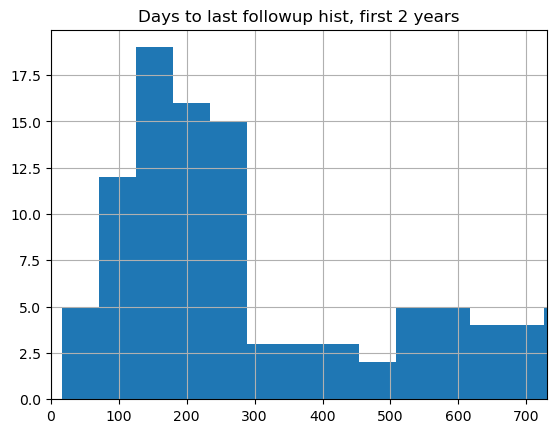

In [56]:
alive.hist(bins=100)
plt.title("Days to last followup hist, first 2 years")
plt.xlim(0, 730) # Focus on the first 2 years

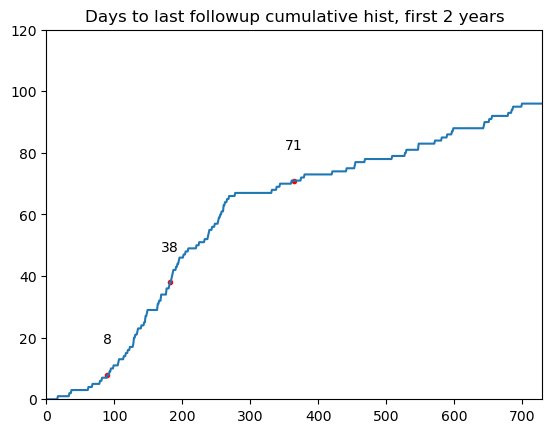

In [57]:
cumulative_value = pd.Series([len([a for a in alive_list if int(a) < i]) for i in range(0, max(alive))])

fig = plt.figure()
ax = fig.add_subplot()

val = [90, 182, 364]
for i in val:
    v = len([a for a in alive_list if int(a) < i])
    ax.text(i, v + 10, "%d" %v, ha="center")
    ax.plot(i, v, '.r')
plt.xlim(0, 730) # Focus on the first 2 years
plt.ylim(0, 120) # Focus on the first 2 years
plt.title("Days to last followup cumulative hist, first 2 years")
plt.plot(cumulative_value)
plt.show()

In [58]:
first_3_month = len([a for a in alive_list if int(a) < 91])
first_6_month = len([a for a in alive_list if int(a) < 183])
first_year = len([a for a in alive_list if int(a) <= 365])
after_year = len([a for a in alive_list if int(a) > 365])
total = len(alive_list)
print(f"Days to last followup")
print(f"Before 3 month total:\t{first_3_month}\t {((first_3_month/total) * 100):.2f}%")
print(f"Before 6 month total:\t{first_6_month}\t {((first_6_month/total) * 100):.2f}%")
print(f"Before 1 years total:\t{first_year}\t {((first_year/total) * 100):.2f}%")
print(f"After 1 years total:\t{after_year}\t {((after_year/total) * 100):.2f}%")

Days to last followup
Before 3 month total:	8	 4.47%
Before 6 month total:	38	 21.23%
Before 1 years total:	71	 39.66%
After 1 years total:	108	 60.34%


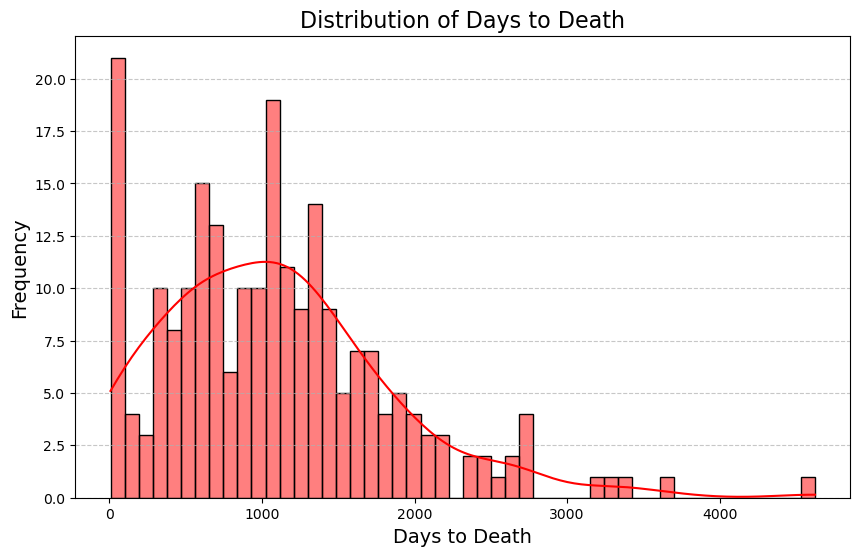

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# In this graph is computed the hist and a kernel density estimate to smooth the distribution.
# Source: "https://seaborn.pydata.org/generated/seaborn.histplot.html".
 
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(dead, bins=50, kde=True, color="red")
plt.title("Distribution of Days to Death", fontsize=16)
plt.xlabel("Days to Death", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

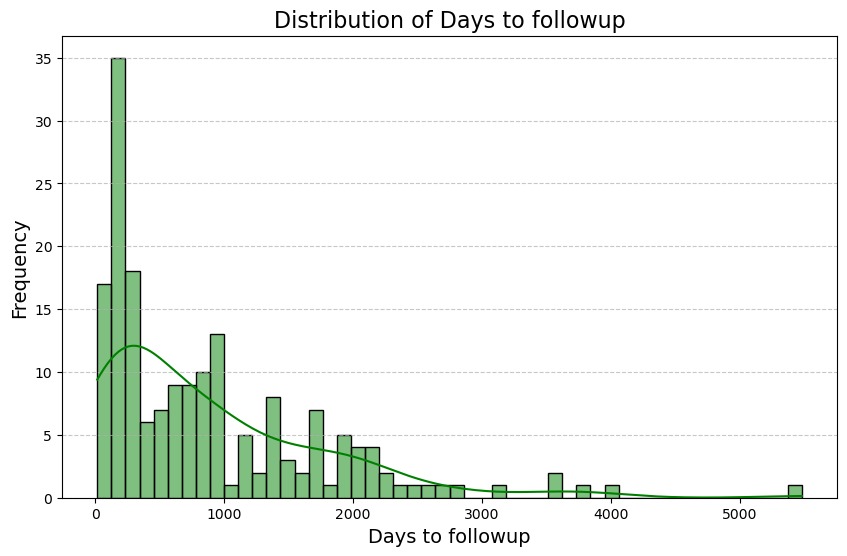

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(alive, bins=50, kde=True, color="green")
plt.title("Distribution of Days to followup", fontsize=16)
plt.xlabel("Days to followup", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [66]:
def plot_based_on_t(center_curve):

    incremental_death = []

    for i in range (center_curve):
        current_val = len([val for val in dead if (val < center_curve + i) and (val > center_curve - i)])
        incremental_death.append(current_val)


    incremental_alive = []

    for i in range (center_curve):
        current_val = len([val for val in alive if (val > center_curve + i)])
        incremental_alive.append(current_val)



    for i in range(center_curve):
        if incremental_alive[i] == incremental_death[i]:
            print(f"Range value: {i}\tAmmount for each subset: {incremental_death[i]}")


    # Importing libraries
    import matplotlib.pyplot as plt
    import numpy as np
    import math

    # Using Numpy to create an array X
    X = pd.Series(range(center_curve))

    # Assign variables to the y axis part of the curve
    y = incremental_alive
    z = incremental_death

    # Plotting both the curves simultaneously
    plt.plot(X, y, color='g', label='alive')
    plt.plot(X, z, color='r', label='dead')

    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("Range")
    plt.ylabel("Ammount in alive and dead")
    plt.title("Dimension for each label by increasing the threshold")

    # Adding legend, which helps us recognize the curve according to it's color
    plt.legend()

    # To load the display window
    plt.show()


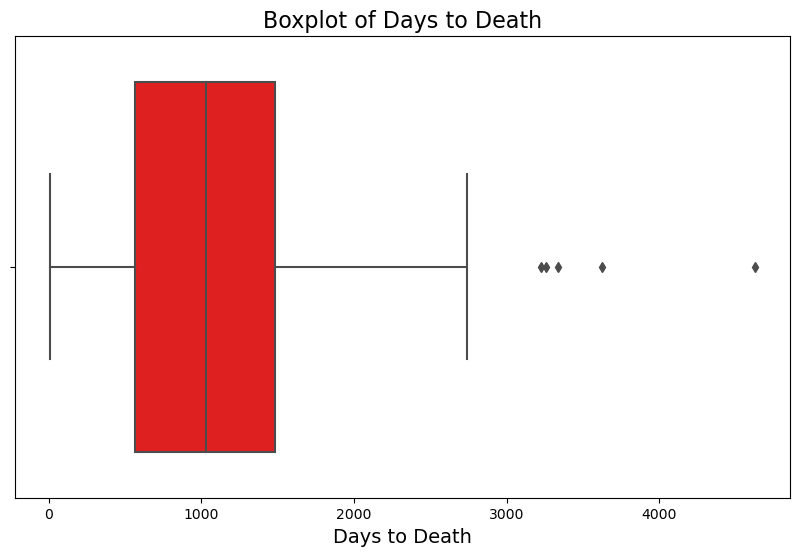

Mean: 1092.93
Median: 1032.5
Standard Deviation: 753.95


In [62]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=dead, color="red")
plt.title("Boxplot of Days to Death", fontsize=16)
plt.xlabel("Days to Death", fontsize=14)
plt.show()
 
# Calculate and print basic statistics
mean_value = np.mean(dead)
median_value = np.median(dead)
std_deviation = np.std(dead)
 
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation:.2f}")
 

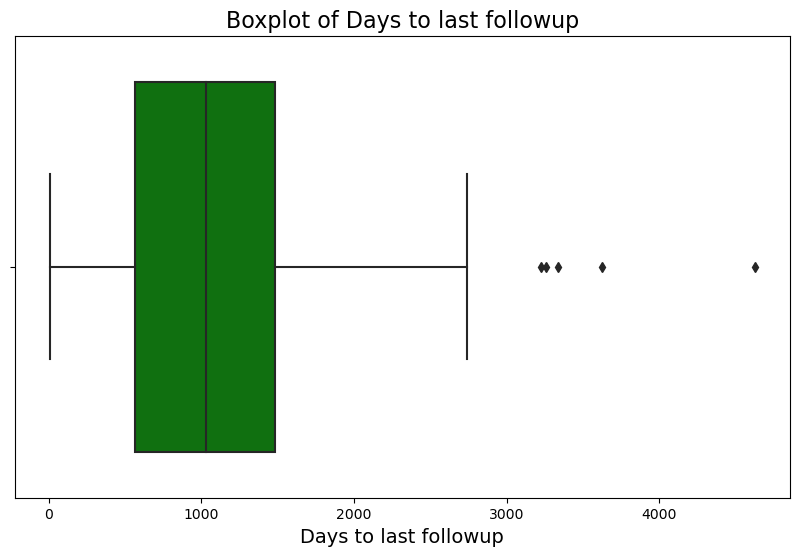

Mean: 894.70
Median: 644.0
Standard Deviation: 893.44


In [63]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=dead, color="green")
plt.title("Boxplot of Days to last followup", fontsize=16)
plt.xlabel("Days to last followup", fontsize=14)
plt.show()
 
# Calculate and print basic statistics
mean_value = np.mean(alive)
median_value = np.median(alive)
std_deviation = np.std(alive)
 
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation:.2f}")
 

Range value: 180	Ammount for each subset: 49
Range value: 181	Ammount for each subset: 49


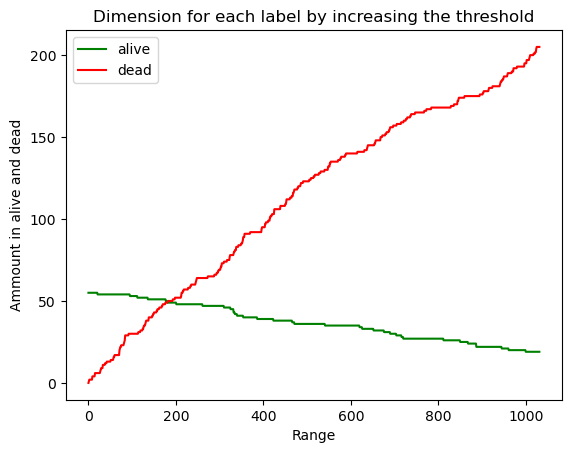

In [67]:
# Now what t to find.

plot_based_on_t(1032)

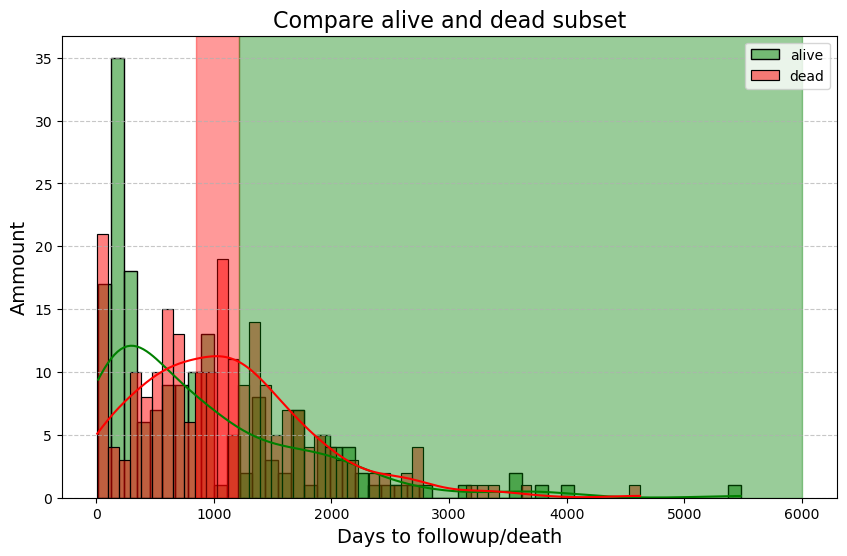

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(alive, bins=50, kde=True, color="green", label="alive")
sns.histplot(dead, bins=50, kde=True, color="red", label="dead")
plt.title("Compare alive and dead subset", fontsize=16)
plt.xlabel("Days to followup/death", fontsize=14)
plt.ylabel("Ammount", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvspan(1032 - 180, 1032 + 180, color='red', alpha=0.4)
plt.axvspan(1032 + 180, 6000, color='green', alpha=0.4)
plt.legend()
plt.show()